In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GroupShuffleSplit
import pandas as pd
from PIL import Image
import seaborn as sns

In [2]:
dataframeMain = pd.read_csv('C:/Users/teams/Image_classification_data/data_labels_mainData.csv')
dataframeExtra = pd.read_csv('C:/Users/teams/Image_classification_data/data_labels_extraData.csv')


dataframeMain.head()
dataframeExtra.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


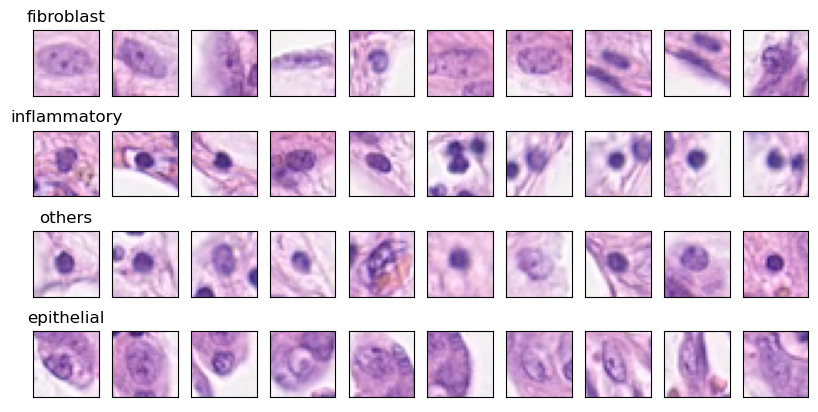

In [3]:
def cell_image(imageName):
    return Image.open('C:/Users/teams/Image_classification_data/patch_images/' + imageName)


rows = 20
    

plt.figure(figsize=(10,5))
unique_cell_types = dataframeMain['cellTypeName'].unique()
for i, cell_type in enumerate(unique_cell_types):
    cell_type_data = dataframeMain[dataframeMain['cellTypeName'] == cell_type][:10] 
    for j, imageName in enumerate(cell_type_data['ImageName']):
        plt.subplot(len(unique_cell_types), 10, (i*10)+j+1) 
        plt.imshow(cell_image(imageName)) 
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.title(cell_type) 
plt.show()
print('')

In [4]:
dataframeMain.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [5]:
dataframeMain.columns

Index(['InstanceID', 'patientID', 'ImageName', 'cellTypeName', 'cellType',
       'isCancerous'],
      dtype='object')

In [6]:
dataframeMain.dtypes

InstanceID       int64
patientID        int64
ImageName       object
cellTypeName    object
cellType         int64
isCancerous      int64
dtype: object

In [7]:
dataframeMain.describe()

,InstanceID,patientID,cellType,isCancerous
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,10193.880154,29.762025,1.501516,0.412187
std,6652.912660,17.486553,0.954867,0.492253
min,1.000000,1.000000,0.000000,0.000000
25%,4135.750000,14.000000,1.000000,0.000000
50%,9279.500000,26.000000,2.000000,0.000000
75%,16821.250000,47.000000,2.000000,1.000000
max,22444.000000,60.000000,3.000000,1.000000


In [8]:
pd.isna(dataframeMain).sum()

InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64

EDA

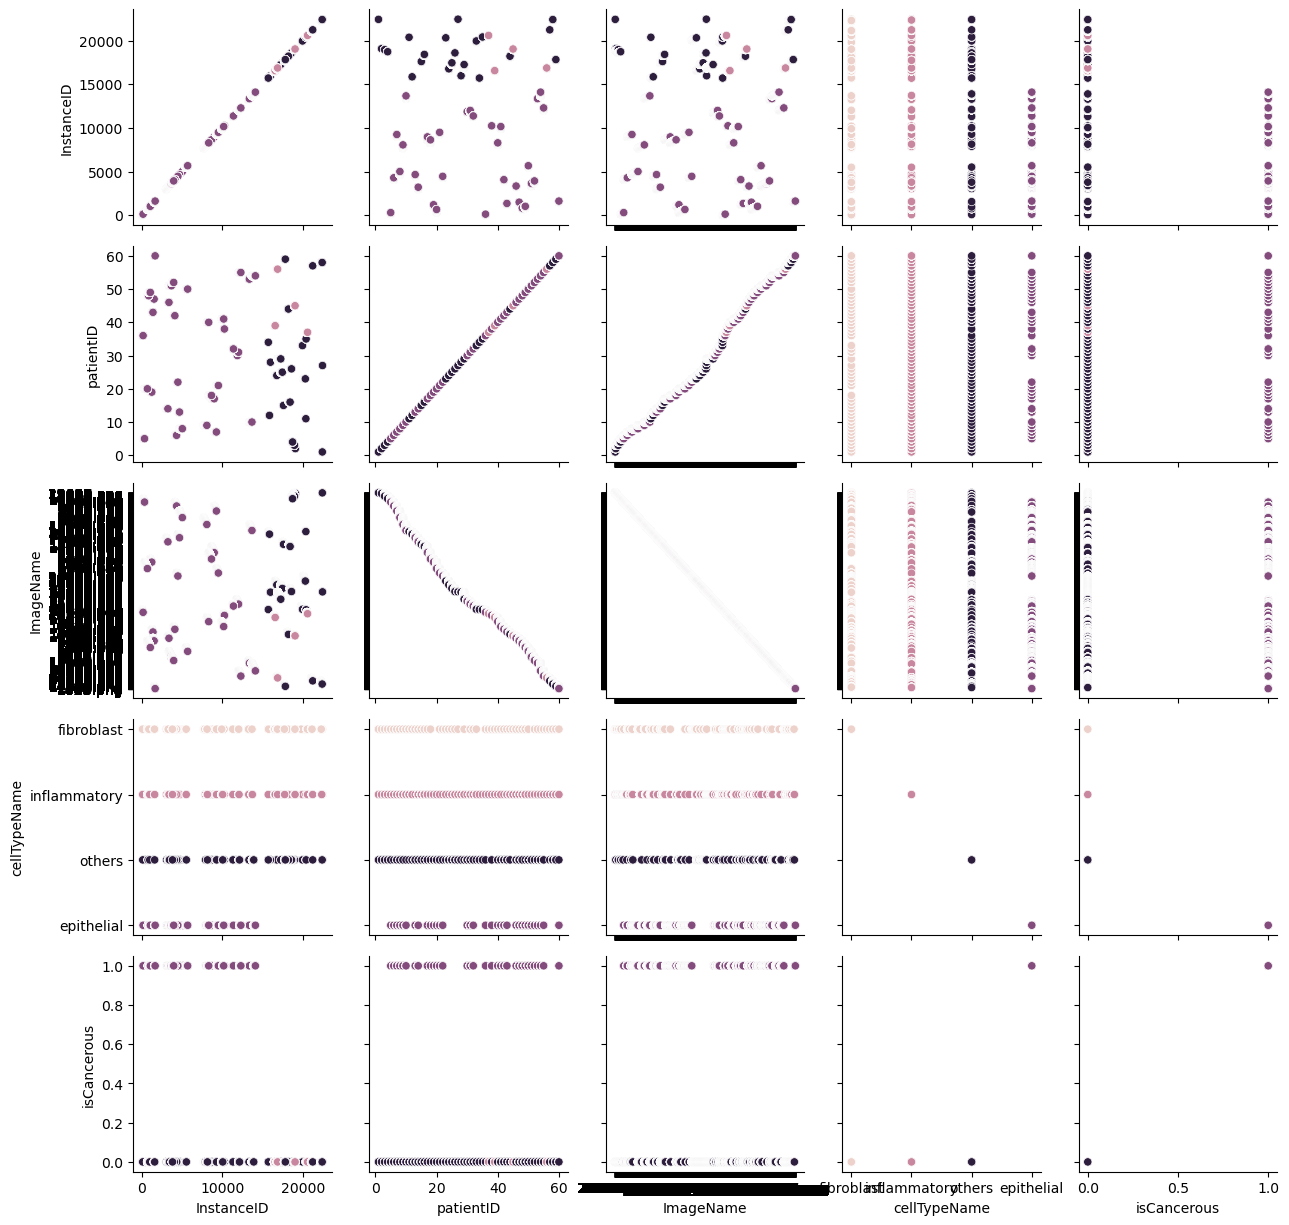

In [13]:
eda1 = sns.PairGrid(dataframeMain, vars=['InstanceID','patientID' , 'ImageName' , 'cellTypeName','isCancerous'  
                             ], hue="cellType")
eda1.map(sns.scatterplot)
plt.show()

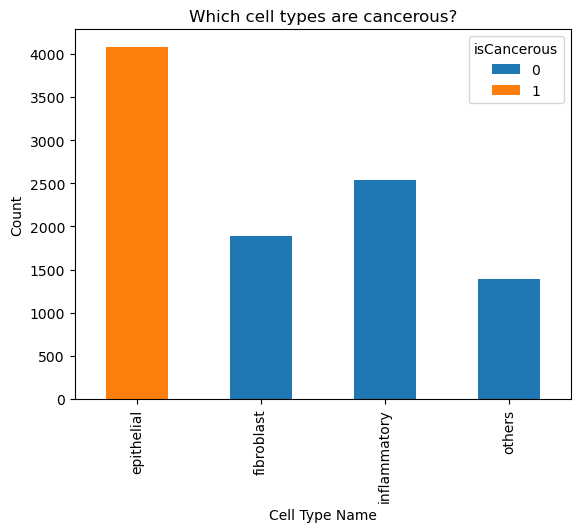

In [12]:
# Stacked bar chart 
grouped_data = dataframeMain.groupby(['cellTypeName', 'isCancerous']).size().reset_index(name='count')
pivoted_data = grouped_data.pivot(index='cellTypeName', columns='isCancerous', values='count')
pivoted_data.plot(kind='bar', stacked=True)
plt.xlabel('Cell Type Name')
plt.ylabel('Count')
plt.title('Which cell types are cancerous?')
plt.show()

In [14]:
print("hello world")

hello world
